In [19]:
using LightGraphs, SimpleWeightedGraphs
using CSV
using PyPlot
using DataFrames

On commence par travailler sur Le temps en 1900.
Il est nécessaire pour la création des graphes de commencer les indices à 1.

In [5]:
flux = CSV.read("../../scraping/scraped_data/city_to_city/lefigaro.csv", delim=",");
flux.A = flux.A .+ 1;
flux.B = flux.B .+ 1;
first(flux,6)

6×44 DataFrames.DataFrame. Omitted printing of 37 columns
│ Row │ id     │ A     │ B     │ 1900     │ 1901     │ 1902     │ 1903     │
│     │ Int64⍰ │ Int64 │ Int64 │ Float64⍰ │ Float64⍰ │ Float64⍰ │ Float64⍰ │
├─────┼────────┼───────┼───────┼──────────┼──────────┼──────────┼──────────┤
│ 1   │ 0      │ 2     │ 1     │ 1287.0   │ 1151.0   │ 1255.0   │ 1154.0   │
│ 2   │ 1      │ 3     │ 1     │ 943.0    │ 995.0    │ 1026.0   │ 1133.0   │
│ 3   │ 2      │ 3     │ 2     │ 704.0    │ 689.0    │ 748.0    │ 798.0    │
│ 4   │ 3      │ 4     │ 1     │ 854.0    │ 778.0    │ 1013.0   │ 847.0    │
│ 5   │ 4      │ 4     │ 2     │ 660.0    │ 539.0    │ 737.0    │ 539.0    │
│ 6   │ 5      │ 4     │ 3     │ 506.0    │ 491.0    │ 666.0    │ 527.0    │

Récupération du nom des villes

In [77]:
df = CSV.read("../../data/villes/Pop_villes_1896_selected.csv");
cities = DataFrame();
cities[:nom] = df.nom;
cities[:pop] = df.population;

Création du graph pondéré pour l'année 1900.

In [7]:
id_column = 4 # column id for year 1900.
g = SimpleWeightedGraph(flux.A[end])  # or use `SimpleWeightedDiGraph` for directed graphs
for i in range(1,size(flux,1))
    add_edge!(g, flux[i,2], flux[i,3], flux[i, id_column])
end
g

{59, 1695} undirected simple Int64 graph with Float64 weights

Tests de centralité

In [8]:
katz = []
pr = []
for y in range(4,44)
    g = SimpleWeightedGraph(flux.A[end])  # or use `SimpleWeightedDiGraph` for directed graphs
    for i in range(1,size(flux,1))
        add_edge!(g, flux[i,2], flux[i,3], flux[i, y])
    end
    katz = append!(katz, katz_centrality(g)[1])
    pr = append!(pr, pagerank(g)[1])
end

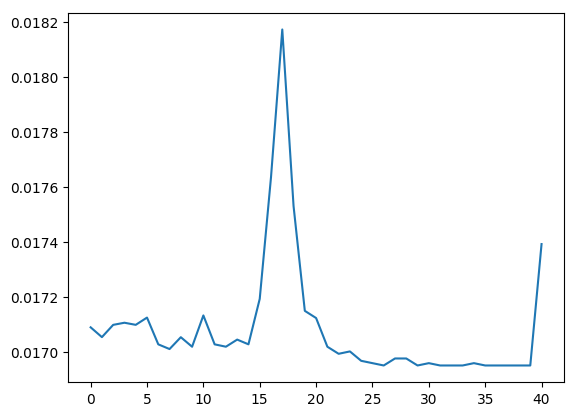

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f18e7fc1470>

In [9]:
PyPlot.plot(pr)

In [11]:
pagerank(g);

observation du nombre d'éléments au sommet

In [78]:
for y in range(1900, 1940)
    cities[Symbol("deg_"*string(y))] = 0;
end
first(cities)

DataFrameRow. Omitted printing of 37 columns
│ Row │ nom     │ pop     │ deg_1900 │ deg_1901 │ deg_1902 │ deg_1903 │
│     │ String⍰ │ Int64⍰  │ Int64    │ Int64    │ Int64    │ Int64    │
├─────┼─────────┼─────────┼──────────┼──────────┼──────────┼──────────┤
│ 1   │ PARIS   │ 2536834 │ 0        │ 0        │ 0        │ 0        │

In [90]:
for id_flux in range(1,size(flux,1))
    id_city_A = flux[id_flux, :A]
    id_city_B = flux[id_flux, :B]
    for y in range(1900,1940)
        cities[id_city_A, Symbol("deg_"*string(y))] += float(flux[id_flux, Symbol(y)])
        cities[id_city_B, Symbol("deg_"*string(y))] += float(flux[id_flux, Symbol(y)])
    end
end

In [91]:
first(cities,6)

6×43 DataFrame. Omitted printing of 37 columns
│ Row │ nom       │ pop     │ deg_1900 │ deg_1901 │ deg_1902 │ deg_1903 │
│     │ String⍰   │ Int64⍰  │ Int64    │ Int64    │ Int64    │ Int64    │
├─────┼───────────┼─────────┼──────────┼──────────┼──────────┼──────────┤
│ 1   │ PARIS     │ 2536834 │ 44700    │ 43610    │ 48068    │ 49840    │
│ 2   │ LYON      │ 466028  │ 29548    │ 25876    │ 31346    │ 30616    │
│ 3   │ MARSEILLE │ 442239  │ 21884    │ 22504    │ 26166    │ 29616    │
│ 4   │ BORDEAUX  │ 256906  │ 20096    │ 18006    │ 26100    │ 24248    │
│ 5   │ LILLE     │ 216276  │ 16932    │ 16072    │ 17024    │ 14882    │
│ 6   │ TOULOUSE  │ 149963  │ 7086     │ 7068     │ 12998    │ 16308    │

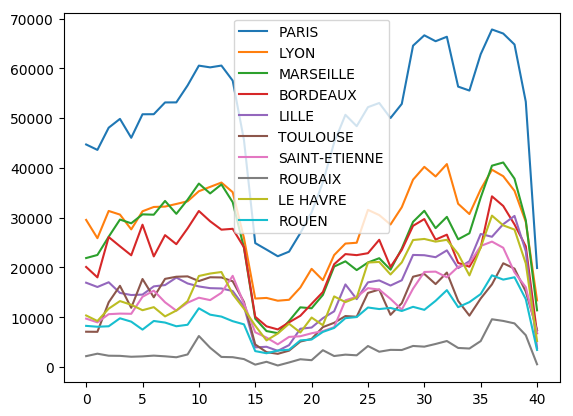

PyObject <matplotlib.legend.Legend object at 0x7f18d9c767b8>

In [99]:
for id_city in range(1,10)
    deg = []
    for y in range(1900,1940)
         deg = append!(deg, cities[id_city, Symbol("deg_"*string(y))])
    end
    PyPlot.plot(deg, label=cities[id_city,:nom])
end
PyPlot.legend()